In [1]:
import pandas as pd
import numpy as np
from matrixprofile import *

In [2]:
df = pd.DataFrame(pd.read_csv("./combined_activities_51319.csv"))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698812 entries, 0 to 2698811
Data columns (total 27 columns):
Unnamed: 0                       int64
userID                           int64
time                             object
subjectID                        object
id.x                             float64
type                             object
relatedID                        object
data                             object
new.category                     object
GoldLabel                        float64
id.y                             float64
links_project                    float64
links_workflow                   float64
metadata_workflow_version        float64
annotations_value_choiceINT      float64
gravityspy_id                    object
annotations_value_choice         object
metadata_finished_at             object
metadata_started_at              object
uniqueID                         object
gold_score                       float64
annotations_value_choice_gold    object
s

Find the negative feedback indexes

In [4]:
neg_index = df[df.gold_score == 0].index.values.tolist()

In [5]:
#classify = {"classify":1, "communal":2, "exploring":3, "learning":4, "personal":5, "socialize":6, "view discussions":7}

In [6]:
#df["new.category2"] = [classify[item] if item in df["new.category2"].values else None for item in df["new.category2"].values]

In [7]:
# only need userID, links_workflow, gold_score time, new.category2 , session
df_lite = df.iloc[:,[1,2,12,20,22,26]]

In [8]:
df_lite.rename(columns = {'new.category2':'category2'}, inplace = True)

/home/jimit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [9]:
df_lite.links_workflow[df_lite.links_workflow == 1610] = 1
df_lite.links_workflow[df_lite.links_workflow == 1934] = 2
df_lite.links_workflow[df_lite.links_workflow == 1935] = 3
df_lite.links_workflow[df_lite.links_workflow == 2360] = 4
df_lite.links_workflow[df_lite.links_workflow == 2117] = 5

/home/jimit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jimit/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/jimit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [10]:
'''
df_lite.category2[df_lite.category2 == 'classify'] = 10
df_lite.category2[df_lite.category2 == 'communal'] = 20
df_lite.category2[df_lite.category2 == 'exploring'] = 30
df_lite.category2[df_lite.category2 == 'learning'] = 40
df_lite.category2[df_lite.category2 == 'personal'] = 50
df_lite.category2[df_lite.category2 == 'socialize'] = 60
df_lite.category2[df_lite.category2 == 'view discussions'] = 70
'''

"\ndf_lite.category2[df_lite.category2 == 'classify'] = 10\ndf_lite.category2[df_lite.category2 == 'communal'] = 20\ndf_lite.category2[df_lite.category2 == 'exploring'] = 30\ndf_lite.category2[df_lite.category2 == 'learning'] = 40\ndf_lite.category2[df_lite.category2 == 'personal'] = 50\ndf_lite.category2[df_lite.category2 == 'socialize'] = 60\ndf_lite.category2[df_lite.category2 == 'view discussions'] = 70\n"

In [11]:
df_lite.gold_score.value_counts()

1.0    559865
0.0     32054
Name: gold_score, dtype: int64

In [12]:
df_lite.gold_score = df_lite.gold_score.fillna(0)

/home/jimit/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df_lite.category2.value_counts()

classify            2523660
view discussions      65237
exploring             45947
learning              34486
socialize             17205
communal               8131
personal               4146
Name: category2, dtype: int64

In [14]:
#max(set(list(df_lite.userID)), key = list(df_lite.userID).count)
len(list(df_lite.userID.unique()))

10733

Create a df for workflow 5

In [15]:
df5 = df_lite[(df_lite.links_workflow == 5)]

In [16]:
df5.reset_index()

,index,userID,time,links_workflow,gold_score,session,category2
0,22004,1057540,2017-02-24 11:16:48,5.0,0.0,11,classify
1,22005,1057540,2017-02-24 11:17:32,5.0,0.0,11,classify
2,22007,1057540,2017-02-24 11:19:13,5.0,0.0,11,classify
3,22008,1057540,2017-02-24 11:22:18,5.0,0.0,11,classify
4,22009,1057540,2017-02-24 11:22:52,5.0,0.0,11,classify
...,...,...,...,...,...,...,...
114437,2693474,986,2017-09-20 12:58:23,5.0,0.0,84,classify
114438,2693475,986,2017-09-20 12:58:41,5.0,0.0,84,classify
114439,2693476,986,2017-09-20 12:58:53,5.0,0.0,84,classify
114440,2693477,986,2017-09-20 12:59:03,5.0,0.0,84,classify


In [17]:
groupeddf = df5.groupby('userID')

In [21]:
my_list_grouped = []
for name, group in groupeddf:
    my_list = [0]
    data1 = group.category2.values.tolist()
    for i in range(0,len(data1)):
        if data1[i] == 'classify':
            my_list.append(my_list[-1]+3)
        elif data1[i] == 'communal':
            my_list.append(my_list[-1]+2)
        elif data1[i] == 'exploring':
            my_list.append(my_list[-1]+1)
        elif data1[i] == 'learning':
            my_list.append(my_list[-1]+0)
        elif data1[i] == 'personal':
            my_list.append(my_list[-1]-1)
        elif data1[i] == 'socialize':
            my_list.append(my_list[-1]-2)
        elif data1[i] == 'view discussions':
            my_list.append(my_list[-1]-3)
    my_list_grouped = my_list_grouped+my_list[1:]

In [22]:
my_list_grouped

[3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 30,
 33,
 36,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 123,
 126,
 129,
 132,
 135,
 138,
 141,
 144,
 147,
 150,
 153,
 156,
 159,
 162,
 165,
 168,
 171,
 174,
 177,
 180,
 183,
 186,
 189,
 192,
 195,
 198,
 201,
 204,
 207,
 210,
 213,
 216,
 219,
 222,
 225,
 228,
 231,
 234,
 237,
 240,
 243,
 246,
 249,
 252,
 255,
 258,
 261,
 264,
 267,
 270,
 273,
 276,
 279,
 282,
 285,
 288,
 291,
 294,
 297,
 300,
 303,
 306,
 309,
 312,
 315,
 318,
 321,
 324,
 327,
 330,
 333,
 336,
 339,
 342,
 345,
 348,
 351,
 354,
 357,
 360,
 363,
 366,
 369,
 372,
 375,
 378,
 381,
 384,
 387,
 390,
 393,
 396,
 399,
 402,
 405,
 408,
 411,
 414,
 417,
 420,
 423,
 426,
 429,
 432,
 435,
 438,
 441,
 444,
 447,
 450,
 453,
 456,
 459,
 462,
 465,
 468,
 471,
 474,
 477,
 480,
 483,
 486,
 489,
 492,
 495,
 498,
 501,
 504,
 507,
 510,
 513,
 516,
 519

In [23]:
df5.userID.unique()

array([1057540, 1191124, 1191730, 1202620, 1244306, 1374419, 1430195,
       1430492, 1443190, 1455469, 1455696, 1483245, 1502635, 1505977,
       1507994, 1507997, 1508485, 1513387, 1517545, 1517687, 1520048,
       1524438, 1525581, 1529419, 1530603, 1530621, 1530882, 1533058,
       1534622, 1534755, 1536599, 1542559, 1543664, 1548316, 1551029,
       1559443, 1559755, 1559856, 1563309, 1563323, 1565910, 1575381,
       1575450, 1598413, 1599151, 1614870, 1630952, 1632885, 1646393,
       1664875, 1677904, 1680775, 1689505,    1856,    2236,  315840,
        316120,  325635,    3307,    3427,    3462,  424439,    4261,
        450605,  501682,    5209,  767062,   95974,     986])

In [24]:
df5['category2'].value_counts()

classify     114439
exploring         3
Name: category2, dtype: int64

In [55]:
#df3['new.category2'][df3['new.category2'] == 'classify'] = 1
#df3['new.category2'][df3['new.category2'] == 'communal'] = 2
#df3['new.category2'][df3['new.category2'] == 'exploring'] = 3
#df3['new.category2'][df3['new.category2'] == 'learning'] = 4
#df3['new.category2'][df3['new.category2'] == 'personal'] = 5
#df3['new.category2'][df3['new.category2'] == 'socialize'] = 6
#df3['new.category2'][df3['new.category2'] == 'view discussions'] = 7
#df3['new.category2'] = df3['new.category2'].map({"classify":1, "communal":2, "exploring":3, "learning":4, "personal":5, "socialize":6, "view discussions":7})

In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114442 entries, 22004 to 2693478
Data columns (total 6 columns):
userID            114442 non-null int64
time              114442 non-null object
links_workflow    114442 non-null float64
gold_score        114442 non-null float64
session           114442 non-null int64
category2         114442 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 6.1+ MB


In [26]:
#df3.userID = pd.to_numeric(df3.userID,downcast = 'integer')
#df5['category2'] = pd.to_numeric(df5['category2'],downcast = 'integer')

In [27]:
#For lossless time series conversion

In [28]:
my_list1 = matrixProfile.to_np_array(my_list_grouped)

In [29]:
len(my_list1)

114442

In [66]:
#set(my_list1)

In [30]:
m = 10
pattern = my_list1

In [31]:
mp = matrixProfile.stomp(pattern,m)

In [32]:
np.unique(mp, return_counts = True)

(array([0.00000000e+00, 4.71216092e-08, 8.16170212e-08, 9.42432183e-08,
        1.15423898e-07, 9.32972162e-06, 1.17800253e-05, 1.62217466e-05,
        1.85115969e-05, 3.02145801e-05, 3.06104091e-05, 5.31934305e-05,
        5.75835511e-05, 5.75835897e-05, 6.53938779e-05, 6.53938949e-05,
        7.07908987e-05, 7.10827092e-05, 8.73858013e-05, 8.73858140e-05,
        9.63608334e-05, 9.69275121e-05, 9.69275236e-05, 1.04313535e-04,
        1.19157152e-04, 1.19157161e-04, 1.26061965e-04, 1.26061974e-04,
        1.28766908e-04, 1.36465962e-04, 1.36465978e-04, 1.36465994e-04,
        1.52094700e-04, 1.53555653e-04, 1.53555689e-04, 1.64617013e-04,
        1.64617020e-04, 1.64646389e-04, 1.64646402e-04, 1.64646409e-04,
        1.68456728e-04, 1.68456734e-04, 1.68456741e-04, 1.68456747e-04,
        1.71451306e-04, 1.75583342e-04, 1.75583367e-04, 1.78203142e-04,
        1.78203148e-04, 1.78203154e-04, 1.81316513e-04, 1.81316525e-04,
        1.85363294e-04, 1.85363306e-04, 1.85599020e-04, 1.855990

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 0, 'Sample')

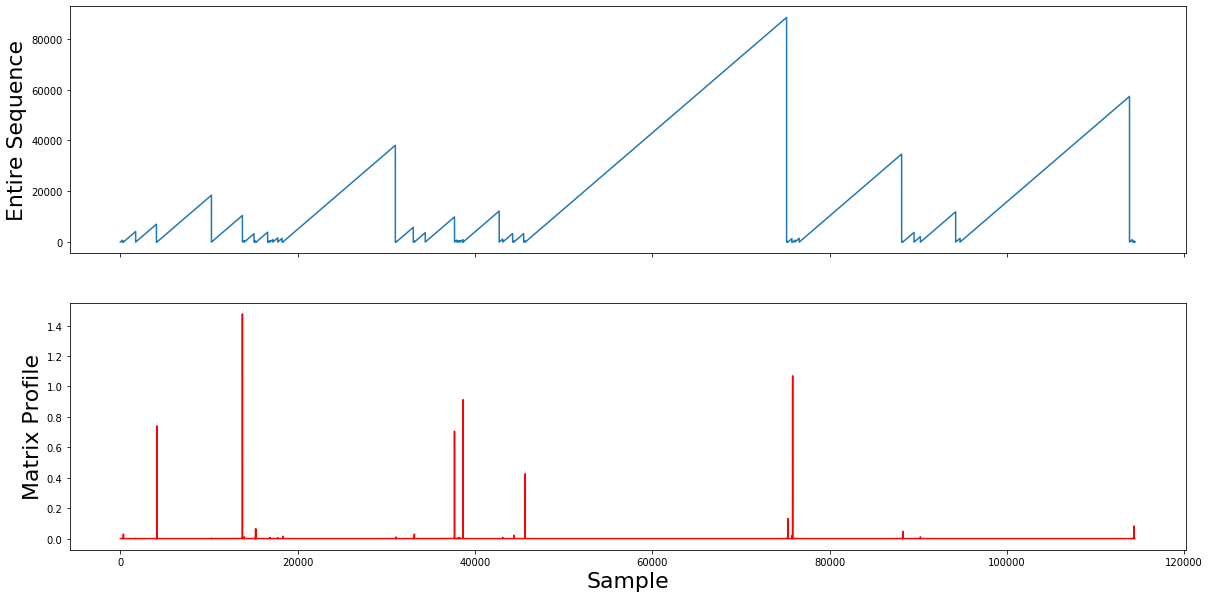

In [34]:
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [35]:
np.where([mp_adj == np.nanmax(mp_adj[100000:120000])])

(array([0, 0, 0]), array([109494, 111576, 112090]))

In [36]:
df5.iloc[[109494, 111576, 112090],:]

,userID,time,links_workflow,gold_score,session,category2
2459828,5209,2016-08-14 11:31:09,5.0,0.0,19,exploring
2476758,5209,2017-09-11 18:45:06,5.0,0.0,254,exploring
2477284,5209,2017-09-20 14:14:06,5.0,0.0,272,exploring


In [37]:
df5.iloc[109494:109494+10,:]

,userID,time,links_workflow,gold_score,session,category2
2459828,5209,2016-08-14 11:31:09,5.0,0.0,19,exploring
2459829,5209,2016-08-14 11:31:10,5.0,0.0,19,classify
2459830,5209,2016-08-14 11:31:21,5.0,0.0,19,classify
2459832,5209,2016-08-14 11:31:42,5.0,0.0,19,classify
2459833,5209,2016-08-14 11:31:53,5.0,0.0,19,classify
2459834,5209,2016-08-14 11:32:30,5.0,0.0,19,classify
2459835,5209,2016-08-14 11:32:50,5.0,0.0,19,classify
2459836,5209,2016-08-14 11:32:58,5.0,0.0,19,classify
2459837,5209,2016-08-14 11:33:12,5.0,0.0,19,classify
2459838,5209,2016-08-14 11:33:30,5.0,0.0,19,classify


Create Matrixprofile for workflow 'n'

In [35]:
def create_matrixprofile(df,n):
    df_n = df[(df.links_workflow == n)]
    print("User id:/n",df_n.userID.unique())
    print("Categories:/n",df_n['category2'].value_counts())
    print("Dataframe information:/n",df_n.info())
    my_list_grouped = []
    groupeddf = df_n.groupby('userID')
    for name, group in groupeddf:
        my_list = [0]
        data1 = group.category2.values.tolist()
        for i in range(0,len(data1)):
            if data1[i] == 'classify':
                my_list.append(my_list[-1]+3)
            elif data1[i] == 'communal':
                my_list.append(my_list[-1]+2)
            elif data1[i] == 'exploring':
                my_list.append(my_list[-1]+1)
            elif data1[i] == 'learning':
                my_list.append(my_list[-1]+0)
            elif data1[i] == 'personal':
                my_list.append(my_list[-1]-1)
            elif data1[i] == 'socialize':
                my_list.append(my_list[-1]-2)
            elif data1[i] == 'view discussions':
                my_list.append(my_list[-1]-3)
        my_list_grouped = my_list_grouped+my_list[1:]
    print("Creating matrixprofile...")
    my_listn = matrixProfile.to_np_array(my_list_grouped)
    m = 10
    pattern = my_listn
    mp = matrixProfile.stomp(pattern,m)
    print("Done")
    return mp

In [36]:
mp4 = create_matrixprofile(df_lite,4)

[ 100423  103110 1036760 ...  997273  997501  999716]
classify     898834
exploring        40
learning          2
Name: category2, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 898876 entries, 305 to 2698811
Data columns (total 6 columns):
userID            898876 non-null int64
time              898876 non-null object
links_workflow    898876 non-null float64
gold_score        898876 non-null float64
session           898876 non-null int64
category2         898876 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 48.0+ MB
None
Creating matrixprofile...


KeyboardInterrupt: 

In [ ]:
mp_adj = np.append(mp4[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [ ]:
np.where([mp_adj == np.nanmax(mp_adj[100000:120000])])

Create Matrixprofile for workflow 3

In [42]:
mp3 = create_matrixprofile(df_lite,3)

[ 100423 1008979  102322 ...  997501  999701  999716]
classify     675333
exploring         7
learning          1
Name: category2, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 675341 entries, 271 to 2698731
Data columns (total 6 columns):
userID            675341 non-null int64
time              675341 non-null object
links_workflow    675341 non-null float64
gold_score        675341 non-null float64
session           675341 non-null int64
category2         675341 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 36.1+ MB
None
Creating matrixprofile...


ValueError: negative dimensions are not allowed

In [ ]:
mp_adj = np.append(mp3[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

Create Matrixprofile for workflow 2

In [41]:
mp2 = create_matrixprofile(df_lite,2)

[1001237  100423 1008979 ...  999682  999701  999716]
classify     397853
exploring        13
learning          1
Name: category2, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397867 entries, 92 to 2698629
Data columns (total 6 columns):
userID            397867 non-null int64
time              397867 non-null object
links_workflow    397867 non-null float64
gold_score        397867 non-null float64
session           397867 non-null int64
category2         397867 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 21.2+ MB
None
Creating matrixprofile...


ValueError: negative dimensions are not allowed

In [ ]:
mp_adj = np.append(mp2[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

Create matrixprofile for workflow 1

In [39]:
mp1 = create_matrixprofile(df_lite,1)

[1000845 1001237  100423 ...  999682  999701  999716]
classify     437201
learning          8
exploring         5
Name: category2, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 437214 entries, 5 to 2698595
Data columns (total 6 columns):
userID            437214 non-null int64
time              437214 non-null object
links_workflow    437214 non-null float64
gold_score        437214 non-null float64
session           437214 non-null int64
category2         437214 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 23.3+ MB
None
Creating matrixprofile...


ValueError: negative dimensions are not allowed

In [ ]:
mp_adj = np.append(mp1[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [40]:
df_lite.links_workflow.value_counts()

4.0    898876
3.0    675341
1.0    437214
2.0    397867
5.0    114442
Name: links_workflow, dtype: int64